## Table Content
    01. Import libarires and dataframe
    02. Compare customer profiles with regions and departments
      a. Age profiles with regions and departments
      b. Income profile with regions and departments
      c. Number of Dependants Profile with regions and departments
      d. bakery Profile with regions and deaprtments
      e. Frozen Profile with regions and departments

####    01. Import libarires and dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path
path = r'C:\Users\SuperHome\Documents\Instacart Basket Analysis'

In [3]:
# Import dataframe
df_active = pd.read_pickle(os.path.join(path,'final_all_columns.pkl'))

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df_active.head(1)

,user_id,Gender,State,Age,n_dependants,fam_status,income,order_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,two_busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_since_prior_order,frequency_flag,department,Region,exclusion_flag,age_profile,income_group,dependant_group,bakery_status,frozen_status
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,two-busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,NaN,Mid parent,High income,Have dependants,0,0


#### 02. Compare customer profiles with regions and departments

###### a. Age profiles with regions and departments

In [4]:
# Create a unique customer profile 
cus_unique = df_active.drop_duplicates(subset = 'user_id')

In [66]:
# Age with regions, number of age groups in each region
age_cross_region = pd.crosstab(cus_unique['age_profile'], cus_unique['Region'], dropna=False)
age_cross_region

Region,Midwest,Northeast,South,West
age_profile,,,,
Mid parent,8632,6448,11994,9162
Old parent,15476,11498,22051,16794
Single,9566,7255,13537,10369
Young parent,4702,3380,6611,5156


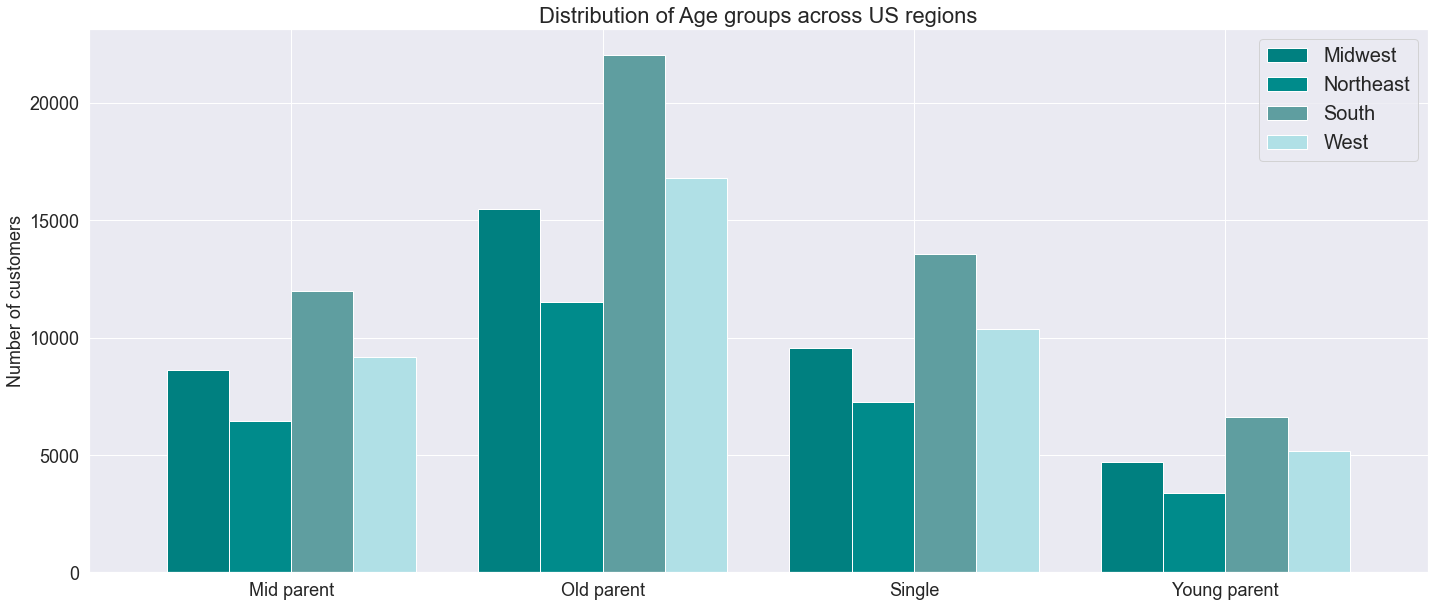

In [67]:
# Create a stackbar-chart to show the distribution of the age groups in different regions
sns.set(rc = {'figure.figsize':(24,10)})

age_cross_region.plot.bar(color=['teal', 'darkcyan','cadetblue','powderblue'], fontsize=18, width = 0.8)
plt.title('Distribution of Age groups across US regions', fontsize=22)
plt.xlabel('', fontsize=20)
plt.ylabel('Number of customers', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'age_cross_region.png'))
plt.show()

In [97]:
age_cross_dep = pd.crosstab(df_active['age_profile'],df_active['department'], dropna=False)
age_cross_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_profile,,,,,,,,,,,,,,,,,,,,,
Mid parent,31089,96908,250743,575155,150347,7425,226432,1160208,223325,184990,474218,159236,57746,150599,14594,7501,399425,96810,20285,2033957,618466
Old parent,57023,160046,452202,1041717,269463,14128,411665,2086334,401280,331276,854292,283454,101607,273043,26312,14132,722430,171391,38575,3647465,1120101
Single,36827,103328,281395,645341,166432,8000,251020,1294376,253382,204296,529348,171358,64461,165878,15935,8714,443904,106205,23602,2275441,690438
Young parent,19688,50110,136488,309688,84608,3898,122957,636264,125847,101574,263873,85809,32177,85261,7927,4064,216946,49900,10598,1122410,337401


We have total of 21 departments and as showing above with the most orders are from 3 departments which are 'beverage','dairy eggs' and 'produce', so I will choose thses 3 departments to compaire.

In [98]:
age_depart_3 = age_cross_dep[['produce','dairy eggs','snacks']]
age_depart_3

department,produce,dairy eggs,snacks
age_profile,,,
Mid parent,2033957,1160208,618466
Old parent,3647465,2086334,1120101
Single,2275441,1294376,690438
Young parent,1122410,636264,337401


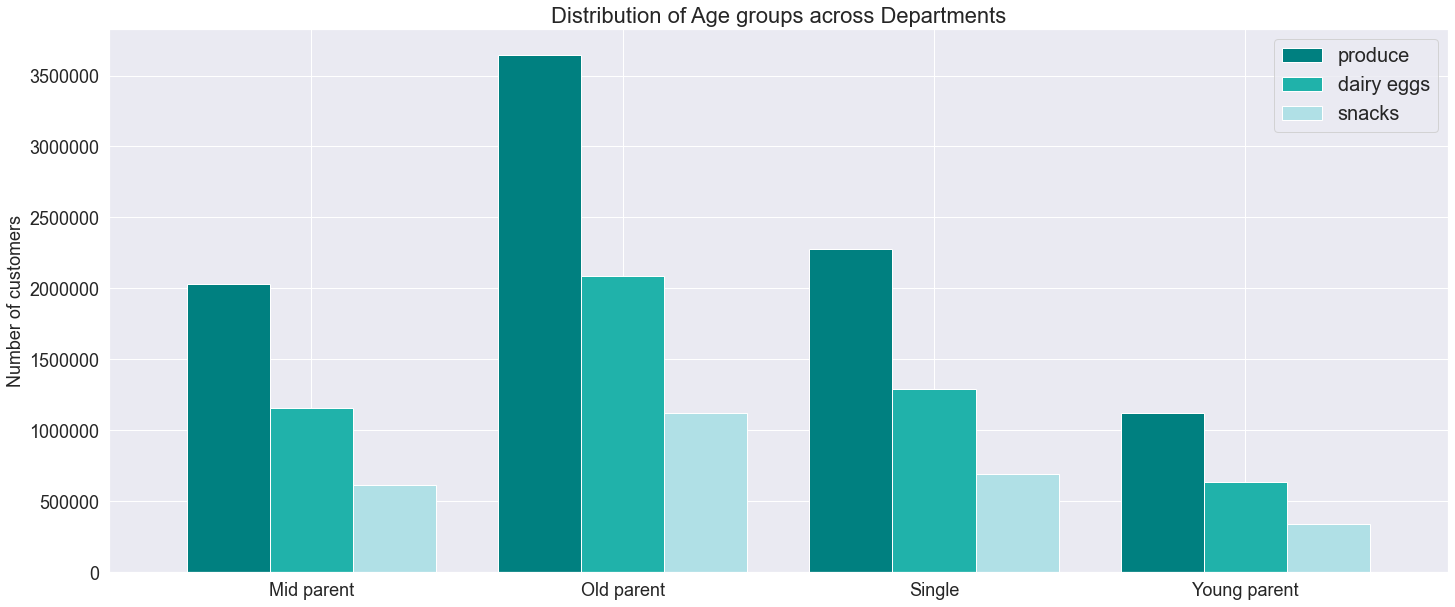

In [288]:
# Create a stackbar-chart to show the distribution of the age groups in different regions
sns.set(rc = {'figure.figsize':(24,10)})

age_depart_3.plot.bar(color=['teal', 'lightseagreen','powderblue'], fontsize=18, width = 0.8)
plt.title('Distribution of Age groups across Departments', fontsize=22)
plt.xlabel('', fontsize=20)
plt.ylabel('Number of customers', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'age_cross_department_top3.png'))
plt.show()

All age groups like ordering in produce department

In [69]:
# Age cross loyalty_flag
age_cross_loyalty = pd.crosstab(cus_unique['age_profile'], cus_unique['loyalty_flag'], dropna=False)
age_cross_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_profile,,,
Mid parent,3813,15294,17129
Old parent,6846,27823,31150
Single,4267,17256,19204
Young parent,2091,8377,9381


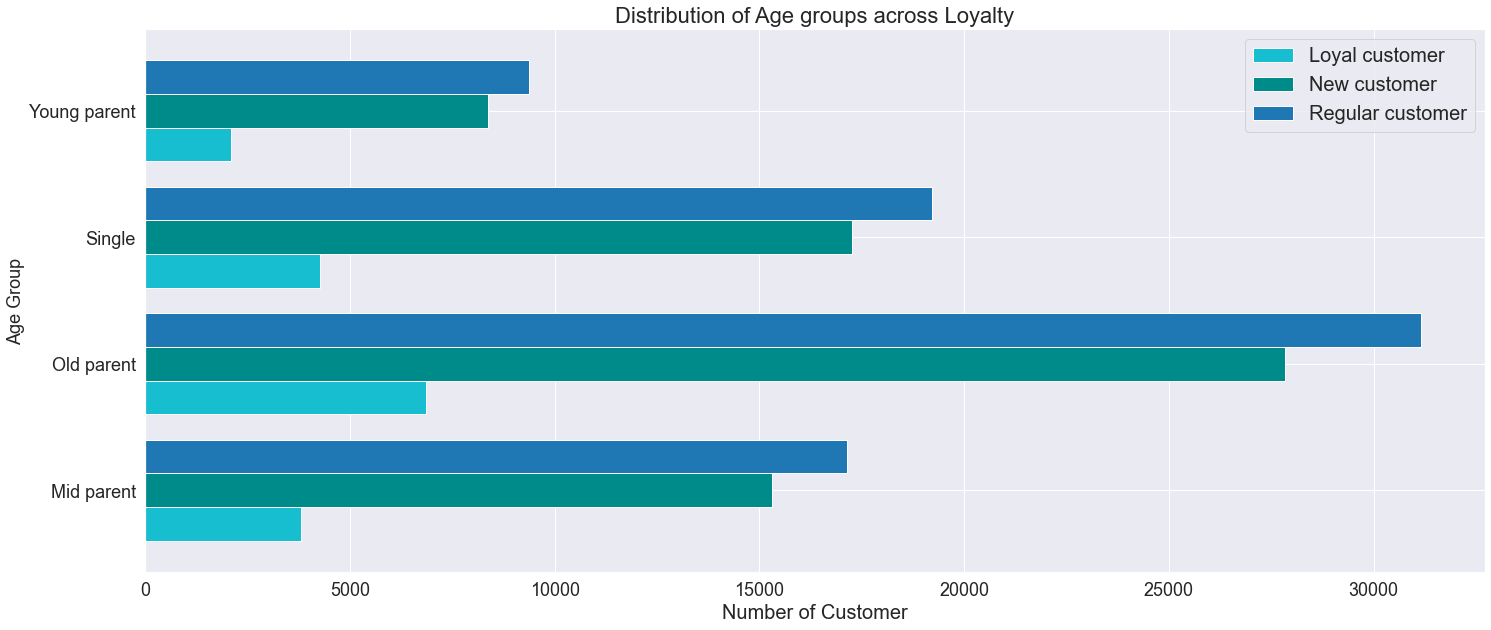

In [43]:
# Create a stackbar-chart to show the distribution of the age groups in different regions
sns.set(rc = {'figure.figsize':(24,10)})

age_cross_loyalty.plot.barh(color=['tab:cyan', 'darkcyan','tab:blue'], fontsize=18, width = 0.8)
plt.title('Distribution of Age groups across Loyalty', fontsize=22)
plt.xlabel('Number of Customer', fontsize=20)
plt.ylabel('Age Group', fontsize=18)
plt.legend(fontsize=20)

plt.savefig(os.path.join(path, 'age_cross_loyalty.png'))
plt.show()

Regular customers are the most often one in these four age groups and we are short of loyal customers tahshould attract our eyes.

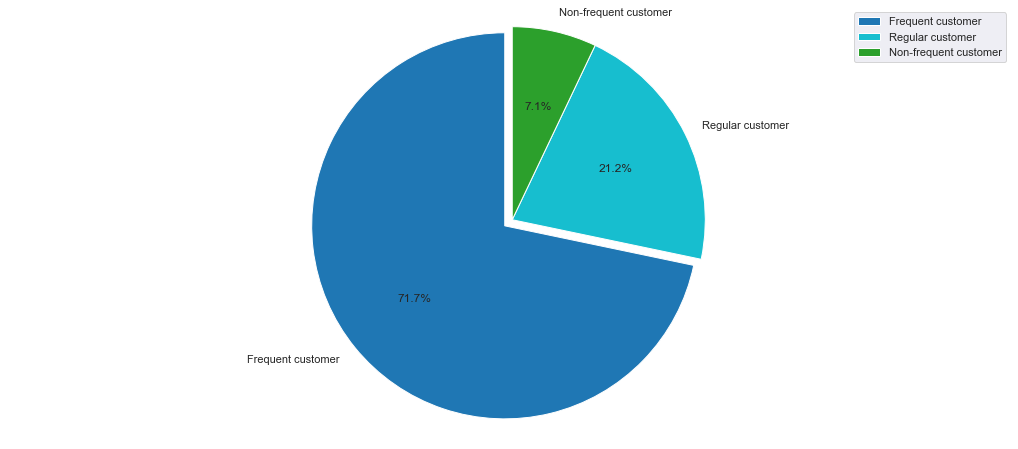

In [109]:
# Customers' frequency perecntage -- Regading about the brand loyalty
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a pie chart for number of dependants

sizes = df_active['frequency_flag'].value_counts()
labels = ['Frequent customer','Regular customer','Non-frequent customer'] 
colors = ['tab:blue','tab:cyan','tab:green'] 

explode = (0.05,0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_frequency.png'))
plt.show()

We have a good percentage on customers who like ordering back and that is a good flag for us

In [113]:
# Customer ordering status by loyalty_flg
loy_cross_dep = pd.crosstab(df_active['loyalty_flag'], df_active['department'], dropna=False)
loy_cross_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,38723,167108,379873,855017,221577,13834,294594,1830707,324046,242580,609460,196873,78394,202480,18350,10715,560402,123365,25469,3147376,943150
New customer,28629,46708,172104,396649,106179,4149,180196,750056,158335,144836,372271,128117,43841,112464,12713,5839,299576,75442,15880,1336604,413107
Regular customer,77275,196576,568851,1320235,343094,15468,537284,2596419,521453,434720,1140000,374867,133756,359837,33705,17857,922727,225499,51711,4595293,1410149


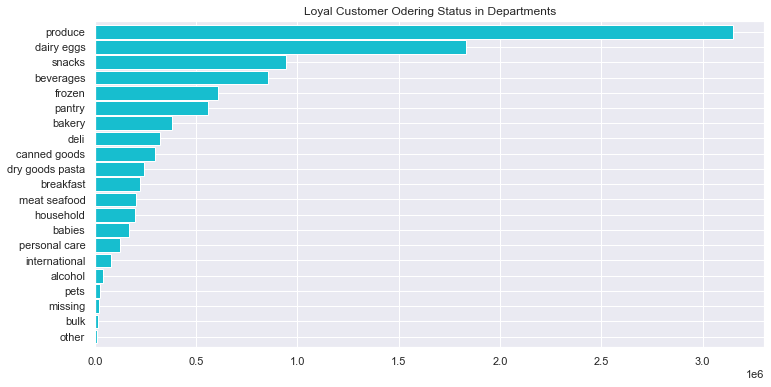

In [137]:
# bar chart showing the orders made by loyal customer
fig, ax = plt.subplots(figsize = (12, 6))
df_active.loc[df_active['loyalty_flag'] == 'Loyal customer']['department'].value_counts().sort_values().plot(kind = 'barh', width = 0.9, color = 'tab:cyan')
#Create a title
ax.set(title = 'Loyal Customer Odering Status in Departments')
plt.savefig(os.path.join(path,'barh_loyal_dep_rank.png'))
plt.show()

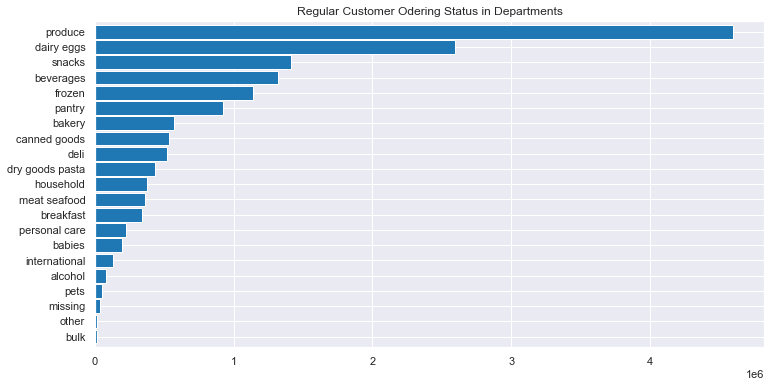

In [141]:
# bar chart showing the orders made by Regular customer
fig, ax = plt.subplots(figsize = (12, 6))
df_active.loc[df_active['loyalty_flag'] == 'Regular customer']['department'].value_counts().sort_values().plot(kind = 'barh', width = 0.9, color = 'tab:blue')
#Create a title
ax.set(title = 'Regular Customer Odering Status in Departments')
plt.savefig(os.path.join(path,'barh_regular_dep_rank.png'))
plt.show()

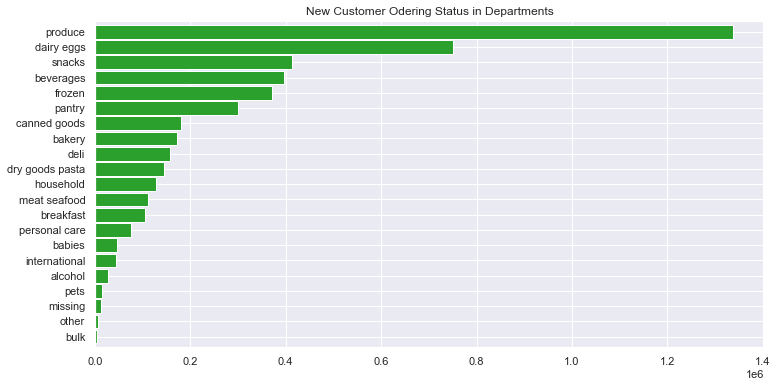

In [142]:
# bar chart showing the orders made by New customer
fig, ax = plt.subplots(figsize = (12, 6))
df_active.loc[df_active['loyalty_flag'] == 'New customer']['department'].value_counts().sort_values().plot(kind = 'barh', width = 0.9, color = 'tab:green')
#Create a title
ax.set(title = 'New Customer Odering Status in Departments')
plt.savefig(os.path.join(path,'barh_New_dep_rank.png'))
plt.show()

Clearly to see, there is no big difference based on a customer's loyalty status.

In [71]:
pd.set_option('display.max_rows', None)

In [72]:
df_active.groupby('Region').agg({'department':['value_counts']})

department
                          value_counts
Region    department                  
Midwest   produce              2134115
          dairy eggs           1212490
          snacks                645143
          beverages             598979
          frozen                498225
          pantry                420334
          bakery                261753
          canned goods          237459
          deli                  234464
          dry goods pasta       193463
          household             166992
          meat seafood          158260
          breakfast             156155
          personal care         100398
          babies                 95741
          international          60666
          alcohol                34043
          pets                   21358
          missing                15563
          other                   7983
          bulk                    7929
Northeast produce              1593004
          dairy eggs            914616
          snacks                493154
          beverages             462929
          frozen                370436
          pantry                312731
          bakery                199300
          deli                  178398
          canned goods          176936
          dry goods pasta       143817
          household             124604
          meat seafood          118571
          breakfast             117904
          personal care          74765
          babies                 72712
          international          44678
          alcohol                25017
          pets                   17734
          missing                11512
          other                   6268
          bulk                    5599
South     produce              3027476
          dairy eggs           1723016
          snacks                916780
          beverages             859419
          frozen                709906
          pantry                591754
          bakery                371620
          canned goods          337458
          deli                  333620
          dry goods pasta       272813
          household             230061
          meat seafood          224120
          breakfast             223172
          personal care         142496
          babies                139511
          international          84649
          alcohol                48813
          pets                   29909
          missing                21787
          other                  11579
          bulk                   11180
West      produce              2324678
          dairy eggs           1327060
          snacks                711329
          beverages             650574
          frozen                543164
          pantry                457886
          bakery                288155
          canned goods          260221
          deli                  257352
          dry goods pasta       212043
          household             178200
          meat seafood          173830
          breakfast             173619
          personal care         106647
          babies                102428
          international          65998
          alcohol                36754
          pets                   24059
          missing                15906
          bulk                    8743
          other                   8581

Actually there is no big difference in ordering habits based on customer's region. Produce, dairy eggs and snack
are the top 3 departments through all of the regions. Our customers all like ordering through the produce department.

#### b. Income profile with regions and departments

In [80]:
#  Income with regions
in_cross_reg = pd.crosstab(cus_unique['income_group'], cus_unique['Region'], dropna=False)
in_cross_reg

Region,Midwest,Northeast,South,West
income_group,,,,
High income,9763,7236,13446,10370
Low income,7295,5552,10486,8034
Mid income,21318,15793,30261,23077


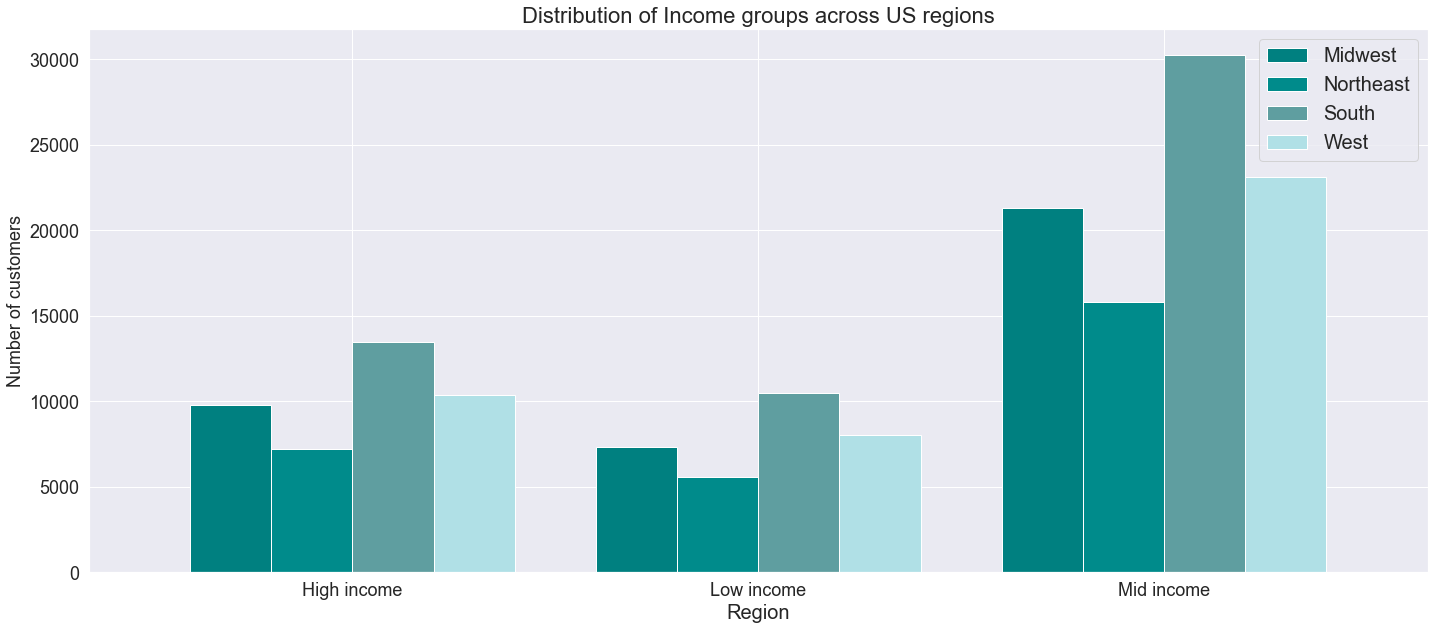

In [343]:
# Create a bar-chart to show the distribution of the income groups in different regions
sns.set(rc = {'figure.figsize':(24,10)})

in_cross_reg.plot.bar(color=['teal', 'darkcyan','cadetblue','powderblue'], fontsize=18, width = 0.8)
plt.title('Distribution of Income groups across US regions', fontsize=22)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'income_cross_region.png'))
plt.show()

customers whose income lowers than 52000 named as 'Low income'

customer whose income greater than 52000 and less or equal 125000 named as 'Mid income'

Customer whose income greater than 125000 named as 'Hign income'

In [92]:
# Income in departments
in_cross_dep = pd.crosstab(df_active['income_group'], df_active['department'], dropna=False)
in_cross_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High income,43115,114043,309803,660418,174136,8053,283724,1404631,267853,227815,578256,188858,69979,195483,17397,9262,489200,113343,26455,2454112,642108
Low income,22199,43438,144086,479742,116540,5974,112945,680816,141758,92401,287968,111508,30240,54717,8902,4958,226221,62888,11782,1139552,673753
Mid income,79313,252911,666939,1431741,380174,19424,615405,3091735,594223,501920,1255507,399491,155772,424581,38469,20191,1067284,248075,54823,5485609,1450545


As we can see the first top 3 departments are still produce, dairy eggs and snacks, what about the last top 3 departments?

In [94]:
last_top3 = in_cross_dep[['other','alcohol','bulk']]
last_top3

department,other,alcohol,bulk
income_group,,,
High income,9262,43115,8053
Low income,4958,22199,5974
Mid income,20191,79313,19424


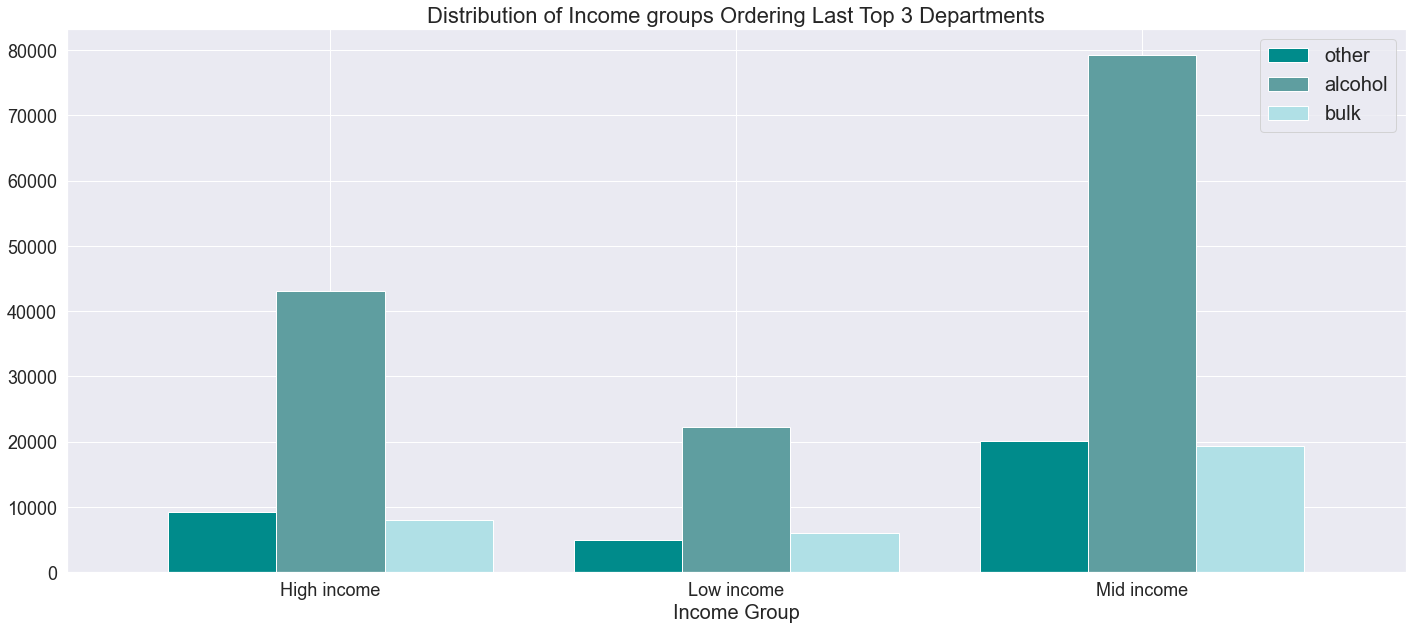

In [289]:
# Create a bar-chart to show the distribution of the income groups in the last top 3 departments
sns.set(rc = {'figure.figsize':(24,10)})

last_top3.plot.bar(color=['darkcyan','cadetblue','powderblue'], fontsize=18, width = 0.8)
plt.title('Distribution of Income groups Ordering Last Top 3 Departments', fontsize=22)
plt.xlabel('Income Group', fontsize=20)
plt.ylabel('', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'income_cross_dep_last_top3.png'))
plt.show()

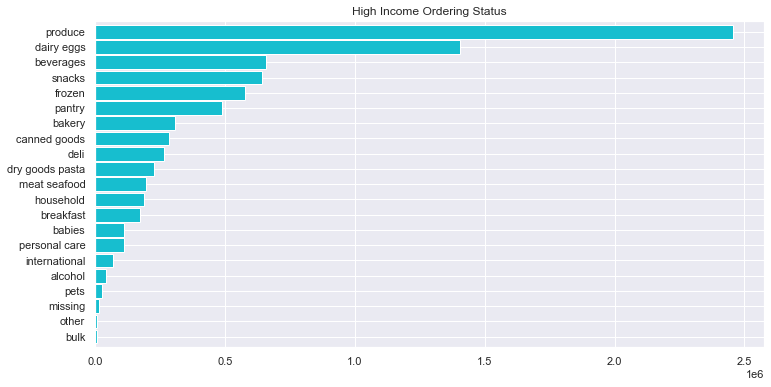

In [71]:
# bar chart showing the orders made for each department
fig, ax = plt.subplots(figsize = (12, 6))
df_active.loc[df_active['income_group'] == 'High income']['department'].value_counts().sort_values().plot(kind = 'barh', width = 0.9, color = 'tab:cyan')
#Create a title
ax.set(title = 'High Income Ordering Status')
plt.savefig(os.path.join(path,'barh_income_high_dep_rank.png'))
plt.show()

#### c. Number of Dependants Profile with regions and departments

In [145]:
depen_cross_region = pd.crosstab(cus_unique['n_dependants'],cus_unique['Region'], dropna=False)
depen_cross_region

Region,Midwest,Northeast,South,West
n_dependants,,,,
0,9566,7255,13537,10369
1,9635,7185,13546,10323
2,9597,7073,13512,10421
3,9578,7068,13598,10368


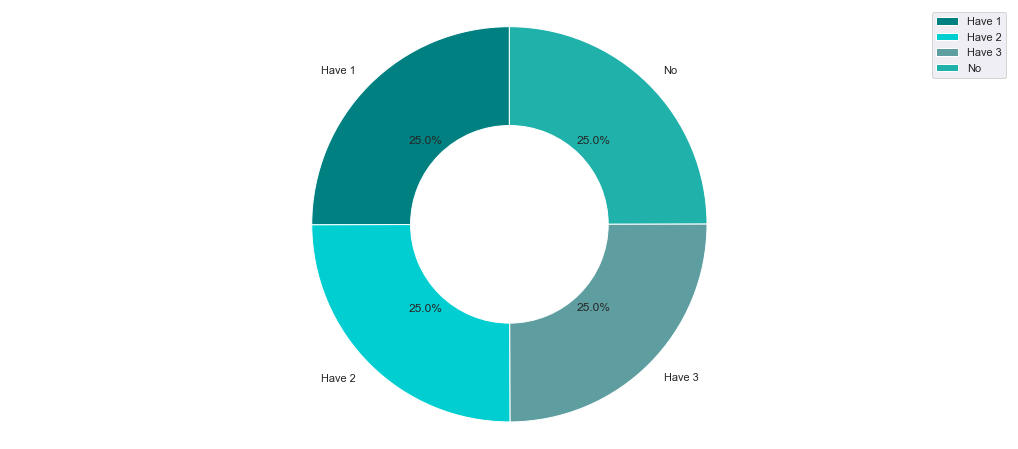

In [194]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a doughnut-chart for All Regions'dependants number

size = cus_unique['n_dependants'].value_counts(dropna = False)
labels = ['Have 1','Have 2','Have 3','No'] 
colors = ['teal','darkturquoise','cadetblue','lightseagreen'] 
explode = (0,0,0,0)
x = [0.4,0,0,0]
plt.pie(size,
        radius = 1,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.6) 
plt.pie(x, radius = 0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_n_depen_region.png'))
plt.show()

In [147]:
dep_status_cross_region = pd.crosstab(cus_unique['Region'], cus_unique['dependant_group'])
dep_status_cross_region

dependant_group,Have dependants,No dependants
Region,,
Midwest,28810,9566
Northeast,21326,7255
South,40656,13537
West,31112,10369


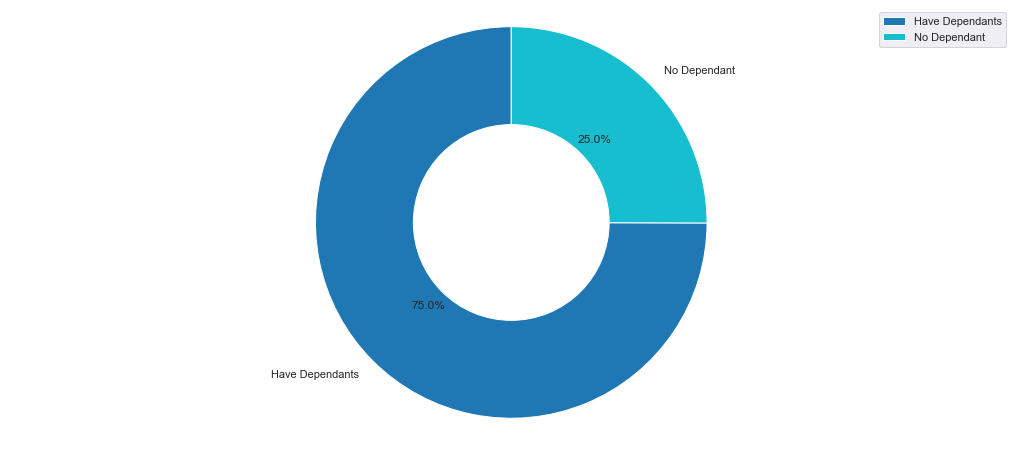

In [305]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for All Regions'dependants status

size = cus_unique['dependant_group'].value_counts(dropna = False)
labels = ['Have Dependants','No Dependant'] 
colors = ['tab:blue','tab:cyan'] 
explode = (0,0)
x = [0.4,0]
plt.pie(size,
        radius=1.0,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90,
                      pctdistance = 0.6) 
plt.pie(x, radius=0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_n_depen_all_region.png'))
plt.show()

In [195]:
# Dependants status in departments
de_cross_dep = pd.crosstab(df_active['department'], df_active['n_dependants'], dropna=False)
de_cross_dep

n_dependants,0,1,2,3
department,,,,
alcohol,36827,35799,34668,37333
babies,103328,99905,104574,102585
bakery,281395,280390,279221,279822
beverages,645341,638747,646886,640927
breakfast,166432,169242,167854,167322
bulk,8000,8573,8475,8403
canned goods,251020,253013,252716,255325
dairy eggs,1294376,1297659,1288883,1296264
deli,253382,247893,249967,252592


There is no big difference based on  dependants numbers for customer ordering status.

#### d. bakery Profile with regions and deaprtments

In [212]:
# What the status for ordering in 'bakery' department based on dependant_group?
df_active.loc[df_active['department'] == 'bakery']['dependant_group'].value_counts()

Have dependants    839433
No dependants      281395
Name: dependant_group, dtype: int64

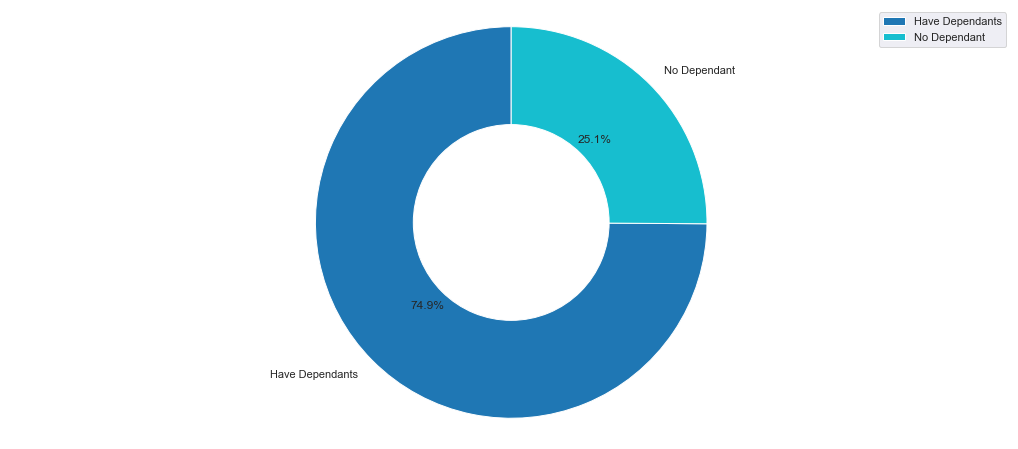

In [304]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for ordering in 'bakery' department based on dependant_group

size = df_active.loc[df_active['department'] == 'bakery']['dependant_group'].value_counts()
labels = ['Have Dependants','No Dependant'] 
colors = ['tab:blue','tab:cyan'] 
explode = (0,0)
x = [0.4,0]
plt.pie(size,
        radius=1.0,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90,
                      pctdistance = 0.6) 
plt.pie(x, radius=0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_bakery_dependant.png'))
plt.show()

In [215]:
# What the status for ordering in 'bakery' department based on loyalty_flag?
df_active.loc[df_active['department'] == 'bakery']['loyalty_flag'].value_counts()

Regular customer    568851
Loyal customer      379873
New customer        172104
Name: loyalty_flag, dtype: int64

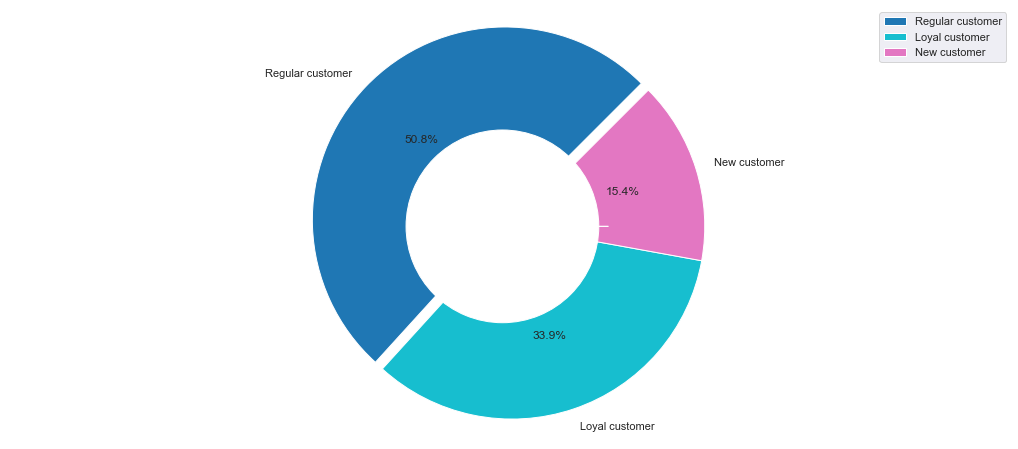

In [303]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for ordering in 'bakery' department based on loyalty_flag

size = df_active.loc[df_active['department'] == 'bakery']['loyalty_flag'].value_counts()
labels = ['Regular customer','Loyal customer','New customer'] 
colors = ['tab:blue','tab:cyan','tab:pink'] 
explode = (0.05,0,0)
x = [0.4,0,0]
plt.pie(size,
        radius=1.0,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 45,
                      pctdistance = 0.6) 
plt.pie(x, radius=0.5, explode = explode, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_bakery_loyalty.png'))
plt.show()

In [223]:
# What the status for ordering in 'bakery' department based on age group?
df_active.loc[df_active['department'] == 'bakery']['age_profile'].value_counts()

Old parent      452202
Single          281395
Mid parent      250743
Young parent    136488
Name: age_profile, dtype: int64

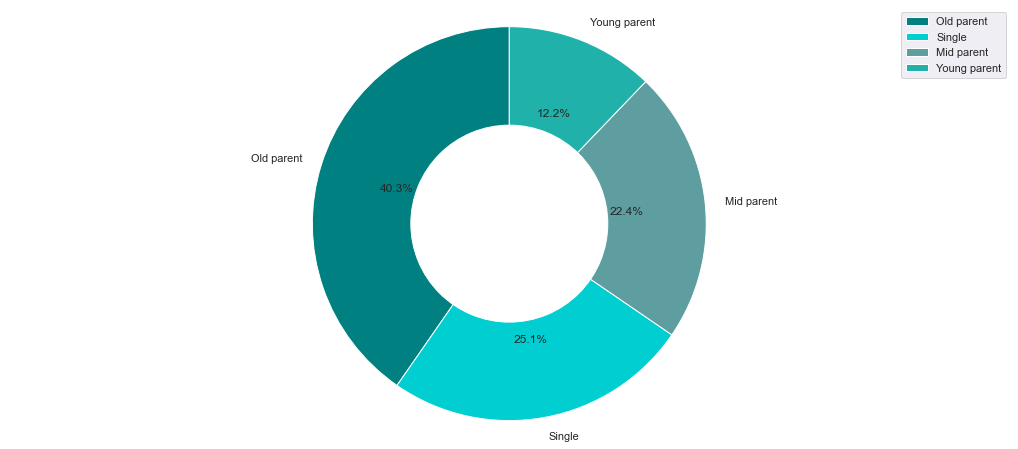

In [226]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a doughnut-chart for ordering in 'bakery' department based on age group

size = df_active.loc[df_active['department'] == 'bakery']['age_profile'].value_counts()
labels = ['Old parent','Single','Mid parent','Young parent'] 
colors = ['teal','darkturquoise','cadetblue','lightseagreen'] 
explode = (0,0,0,0)
x = [0.3,0,0,0]
plt.pie(size,
        radius = 1,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.6) 
plt.pie(x, radius = 0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_bakery_age.png'))
plt.show()

Seems old parent whose age is above 55 in regular customer flag and has dependant like ordering from bakery department the most.

In [239]:
df_active['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [243]:
df_active.loc[df_active['department'] == 'bakery']['department'].value_counts(dropna=False)

bakery    1120828
Name: department, dtype: int64

In [244]:
df_active['department'].count()

30964564

In [15]:
df_active['product_name'].value_counts()

Banana                                       453164
Bag of Organic Bananas                       366403
Organic Strawberries                         255988
Organic Baby Spinach                         231772
Organic Hass Avocado                         206799
                                              ...  
Homestlye Cornbread Stuffing                      1
Florentine Spinach and Cheese Pasta Sauce         1
Chicken Egg Roll                                  1
Organic Jasmine Pearl Green Tea Box               1
Boneless Beef Top Round Steak                     1
Name: product_name, Length: 49630, dtype: int64

In [49]:
product_top10 = pd.DataFrame(df_active['product_name'].value_counts())
product_top10.head(10)

,product_name
Banana,453164
Bag of Organic Bananas,366403
Organic Strawberries,255988
Organic Baby Spinach,231772
Organic Hass Avocado,206799
Organic Avocado,168267
Large Lemon,145397
Strawberries,136330
Limes,134751
Organic Whole Milk,133514


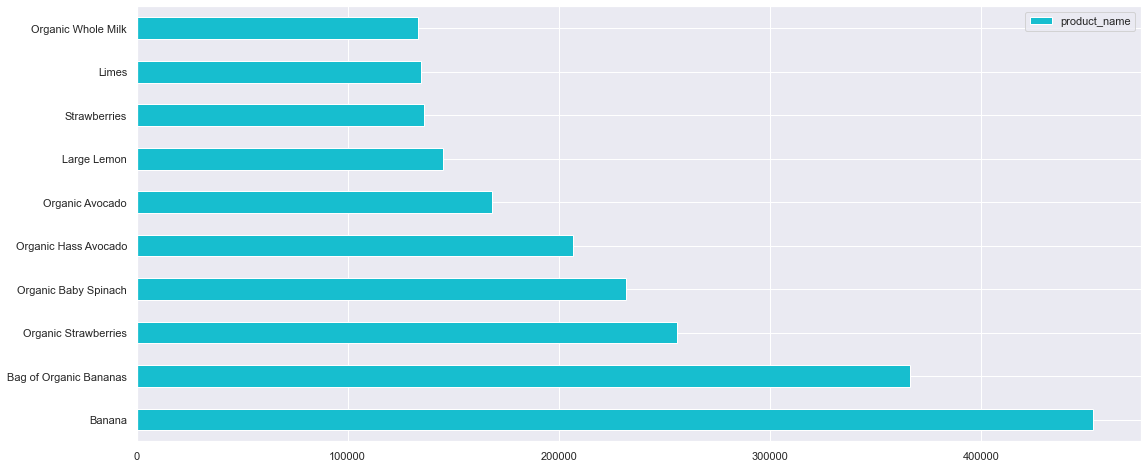

In [64]:
# Create a bar chart for top 10 products
product_top10.head(10).plot(kind = 'barh', width = 0.5, color = 'tab:cyan')
plt.savefig(os.path.join(path,'barh_product_top10.png'))
plt.show()

As showing above we have the top 10 products and most of them are from produce department.

In [48]:
product_last_top10 = pd.DataFrame(df_active['product_name'].value_counts())
product_last_top10.tail(10)

,product_name
7.04 Oz. Grahamfuls Banana Vanilla 8ct,1
Florentine Spinach & Cheese Pasta Sauce,1
B-Complex 100 Stress Formula,1
Cajun Sides Dirty Rice,1
Petite Black Eyed Peas,1
Homestlye Cornbread Stuffing,1
Florentine Spinach and Cheese Pasta Sauce,1
Chicken Egg Roll,1
Organic Jasmine Pearl Green Tea Box,1
Boneless Beef Top Round Steak,1


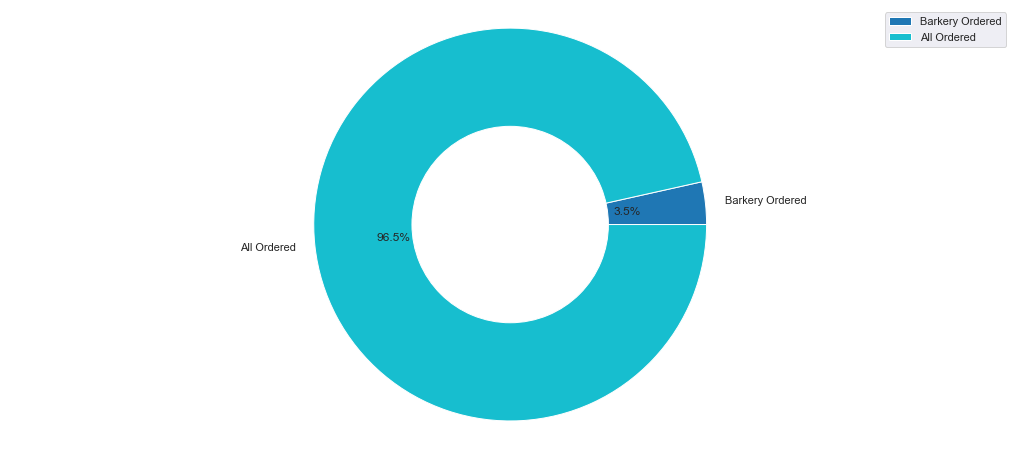

In [5]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for ordering in 'bakery' department through all departments

size = (df_active.loc[df_active['department'] == 'bakery']['department'].value_counts(dropna=False),df_active['department'].count())
labels = ['Barkery Ordered','All Ordered'] 
colors = ['tab:blue','tab:cyan'] 
explode = (0,0)
x = [0.7,0]
plt.pie(size,
        radius = 1.0,
        explode = explode,
        colors = colors,
        labels = labels,
        autopct = '%3.1f%%',
        shadow = False, 
        startangle = 0,
        pctdistance = 0.6) 
plt.pie(x, explode = explode, radius=0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_bakery_dependant_all.png'))
plt.show()

#### e. Frozen Profile with regions and departments

In [231]:
# Frozen with regions and departments
df_active.loc[df_active['department'] == 'frozen']['Region'].value_counts(dropna=False)

South        709906
West         543164
Midwest      498225
Northeast    370436
Name: Region, dtype: int64

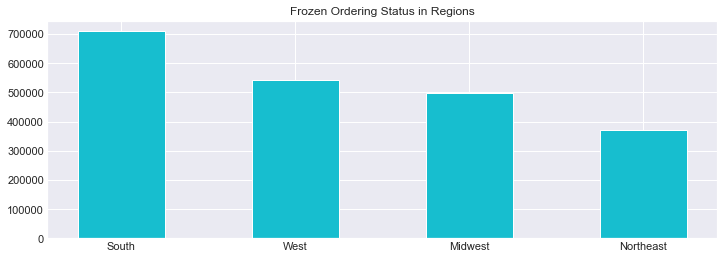

In [237]:
# Create a bar chart to see which region order the most from frozen department.
fig, ax = plt.subplots(figsize = (12,4))
x = ['South','West','Midwest','Northeast']
y = df_active.loc[df_active['department'] == 'frozen']['Region'].value_counts(dropna=False)
plt.bar(x, y, width = 0.5, color='tab:cyan')

# Create a title
ax.set(title = 'Frozen Ordering Status in Regions')

# Hiding ticks
ax.tick_params(axis = 'both', which = 'both', length=0)

plt.savefig(os.path.join(path,'bar_frozen_region.png'))
plt.show()

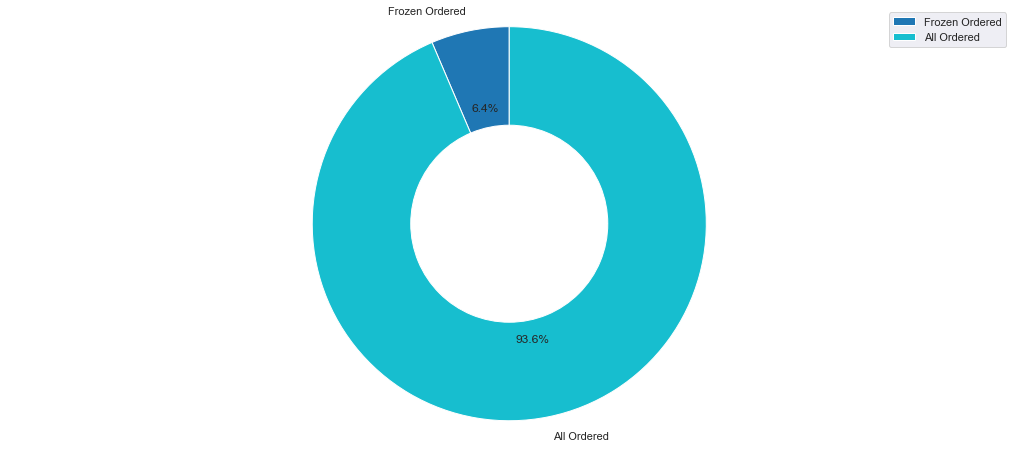

In [301]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for ordering in 'frozen' department through all departments

size = (df_active.loc[df_active['department'] == 'frozen']['department'].value_counts(dropna=False),df_active['department'].count())
labels = ['Frozen Ordered','All Ordered'] 
colors = ['tab:blue','tab:cyan'] 
explode = (0,0)
x = [0.4,0]
plt.pie(size,
        radius=1.0,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90,
                      pctdistance = 0.6) 
plt.pie(x, radius=0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_frozen_dependant_all.png'))
plt.show()

### Extra Visulizations

In [263]:
df_active.loc[df_active['product_name']== 'Banana']['product_name'].value_counts()

Banana    453164
Name: product_name, dtype: int64

In [264]:
df_active.loc[df_active['department']== 'produce']['department'].value_counts()

produce    9079273
Name: department, dtype: int64

#### Banana has the most orders in produce department and the produce department is the top 1 department with the most orders

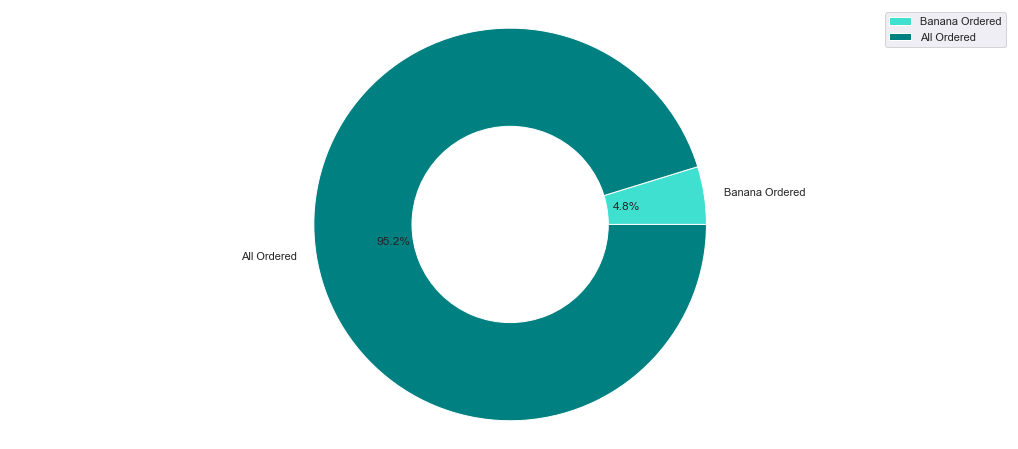

In [302]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a donut-chart for banana total orders in produce department

size = (453164, 9079273)
labels = ['Banana Ordered','All Ordered'] 
colors = ['turquoise','teal'] 
explode = (0,0)
x = [0.4,0]
plt.pie(size,
        radius=1.0,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle =0,
                      pctdistance = 0.6) 
plt.pie(x, radius=0.5, colors = 'w')
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_banana_order.png'))
plt.show()

#### Age and family status connection in terms of ordering habits

In [277]:
age_cross_price = pd.crosstab(df_active['age_profile'],df_active['price_label'],dropna=False)
age_cross_price

price_label,High-range product,Low-range product,Mid-range product,No data
age_profile,,,,
Mid parent,88377,2166889,4683121,1072
Old parent,159023,3902592,8414397,1924
Single,96282,2419238,5222988,1173
Young parent,49394,1186121,2571265,708


The price range means when the selling price >= 5 then we difined them as 'low-range product' and >=15 price> 5
we defined them as 'Mid-range produce', any of the selling price > 15 named as 'High-range product'


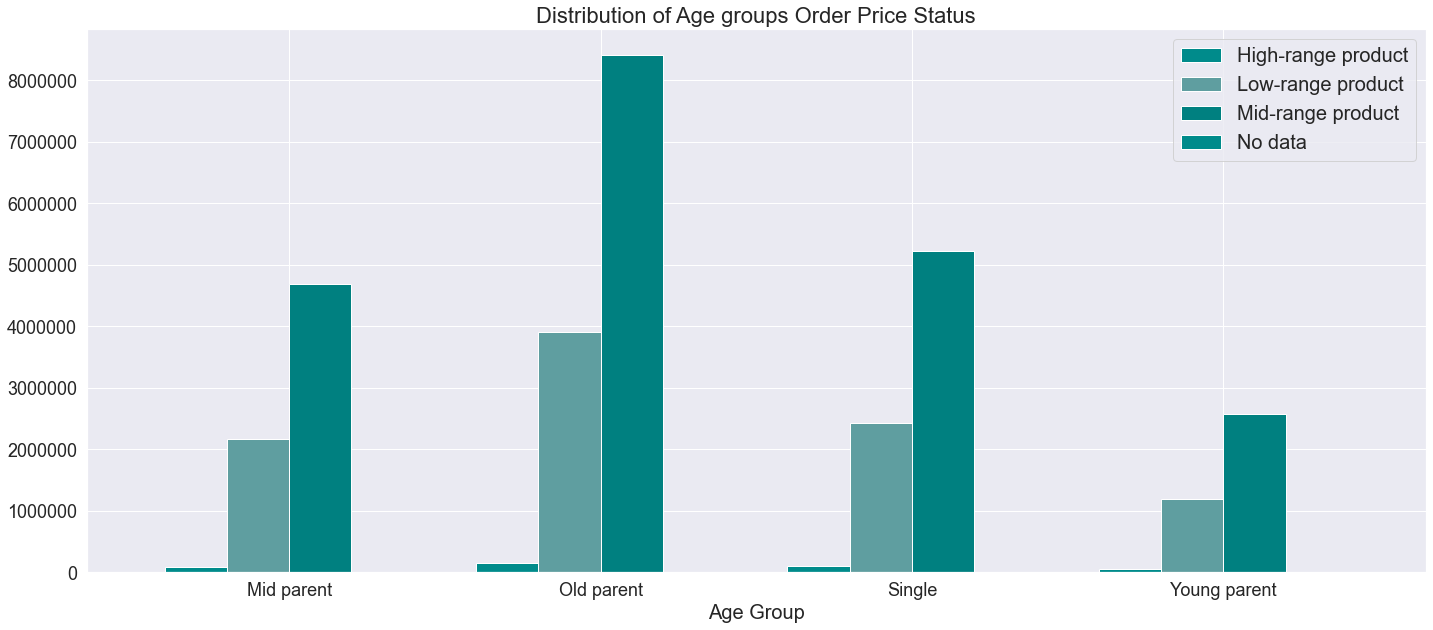

In [294]:
# Create a bar-chart to show the distribution of the age groups in the price range
sns.set(rc = {'figure.figsize':(24,10)})
age_cross_price.plot.bar(color=['darkcyan','cadetblue','teal'],fontsize=18, width = 0.8)
plt.title('Distribution of Age groups Order Price Status', fontsize=22)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'age_cross_price.png'))
plt.show()

Old parents whose age above 55 and has at least one dependant ordering the most both in 'Mid-rang' and 'High-range', young parent whose age is under 35 ordering the fewest.

In [279]:
# How about the fam_status ordering price habits?
fam_cross_price = pd.crosstab(df_active['fam_status'], df_active['price_label'], dropna=False)
fam_cross_price

price_label,High-range product,Low-range product,Mid-range product,No data
fam_status,,,,
divorced/widowed,33694,826382,1784755,440
living with parents and siblings,18804,461807,1000368,193
married,277990,6793795,14668415,3511
single,62588,1592856,3438233,733


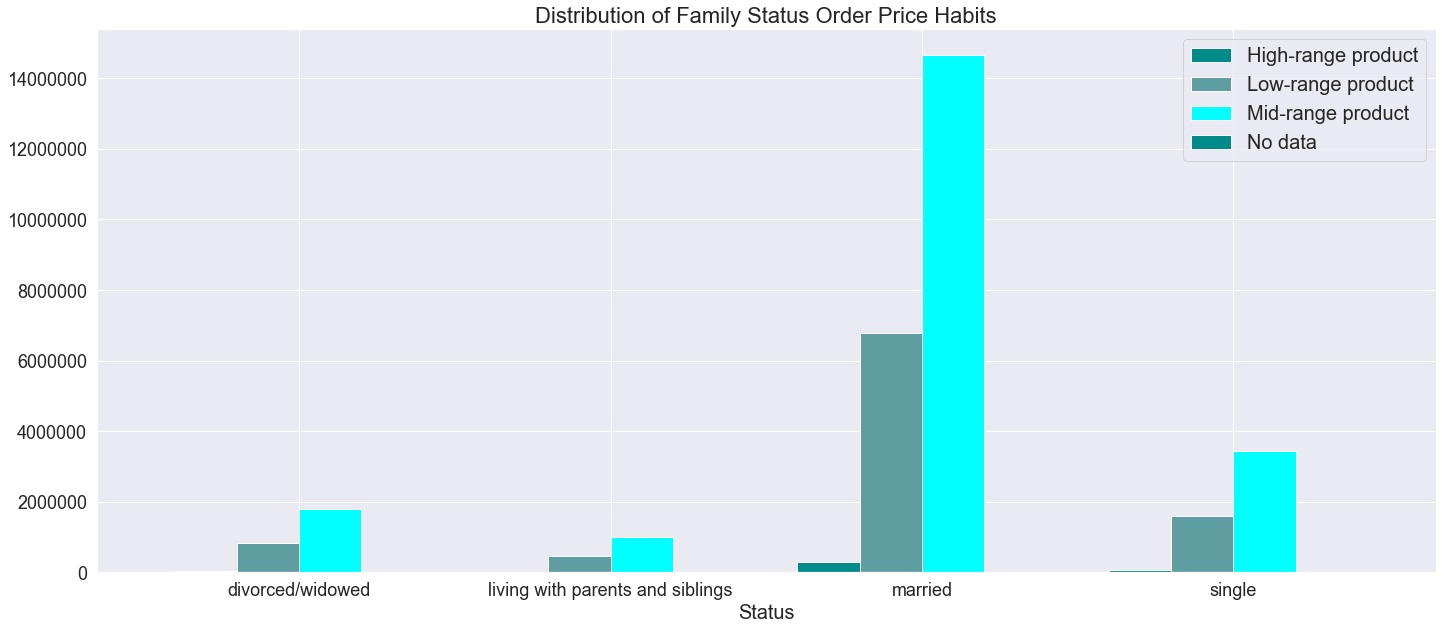

In [295]:
# Create a bar-chart to show the distribution of the fam_status in the price range
sns.set(rc = {'figure.figsize':(24, 10)})
fam_cross_price.plot.bar(color=['darkcyan','cadetblue','cyan'], fontsize=18, width=0.8)
plt.title('Distribution of Family Status Order Price Habits', fontsize=22)
plt.xlabel('Status', fontsize=20)
plt.ylabel('', fontsize=18)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')

plt.savefig(os.path.join(path, 'fam_cross_price.png'))
plt.show()

The most ordering comes from married family status and those fmailies also have at least one dependants, it is connected with the age group that our most orders come from age above 35 who got marrired and have at least one dependant.

#### Differences in ordering habits of different customer profiles

In [340]:
age_cross_day = pd.crosstab(df_active['day_of_week'], df_active['age_profile'], dropna=False)
age_cross_day

age_profile,Mid parent,Old parent,Single,Young parent
day_of_week,,,,
0,1319380,2381501,1477078,730651
1,1206657,2174666,1362350,668013
2,908076,1621243,1002581,492806
3,822861,1479448,917042,450184
4,813578,1459596,905259,446561
5,899841,1622541,1014174,497173
6,969066,1738941,1061197,522100


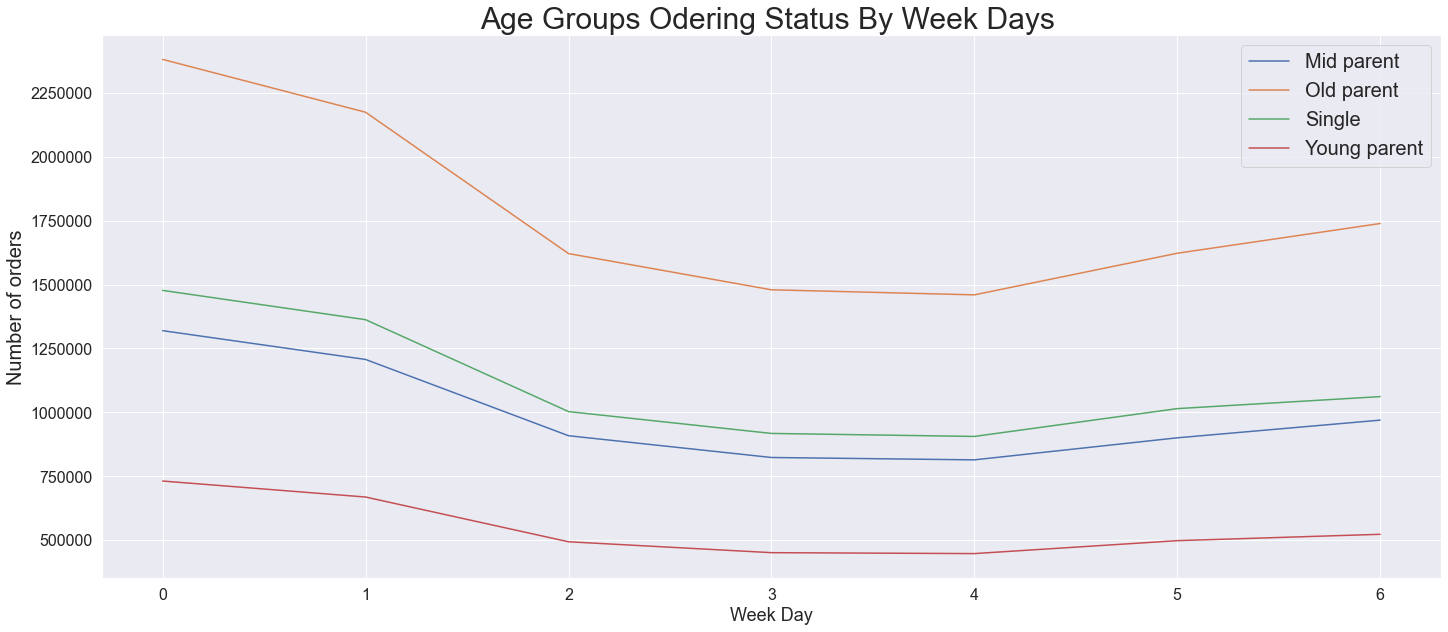

In [349]:
age_cross_day.plot(kind = 'line', fontsize=16)

plt.title('Age Groups Odering Status By Week Days ', fontsize=30)
plt.xlabel('Week Day', fontsize=18)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
# Save lineplot chart as png
plt.savefig(os.path.join(path,'line_age_by_day_order.png'))
plt.show()

In [351]:
age_cross_hour = pd.crosstab(df_active['order_hour_of_day'], df_active['age_profile'],dropna=False)
age_cross_hour

age_profile,Mid parent,Old parent,Single,Young parent
order_hour_of_day,,,,
0,46190,84199,51434,26219
1,25075,44338,26731,13477
2,14744,25838,16732,8377
3,10421,19735,12375,6265
4,10045,22040,12205,6473
5,17834,35029,21284,10271
6,60682,114386,70870,35075
7,188421,348519,220071,106202
8,371846,668672,415947,202645


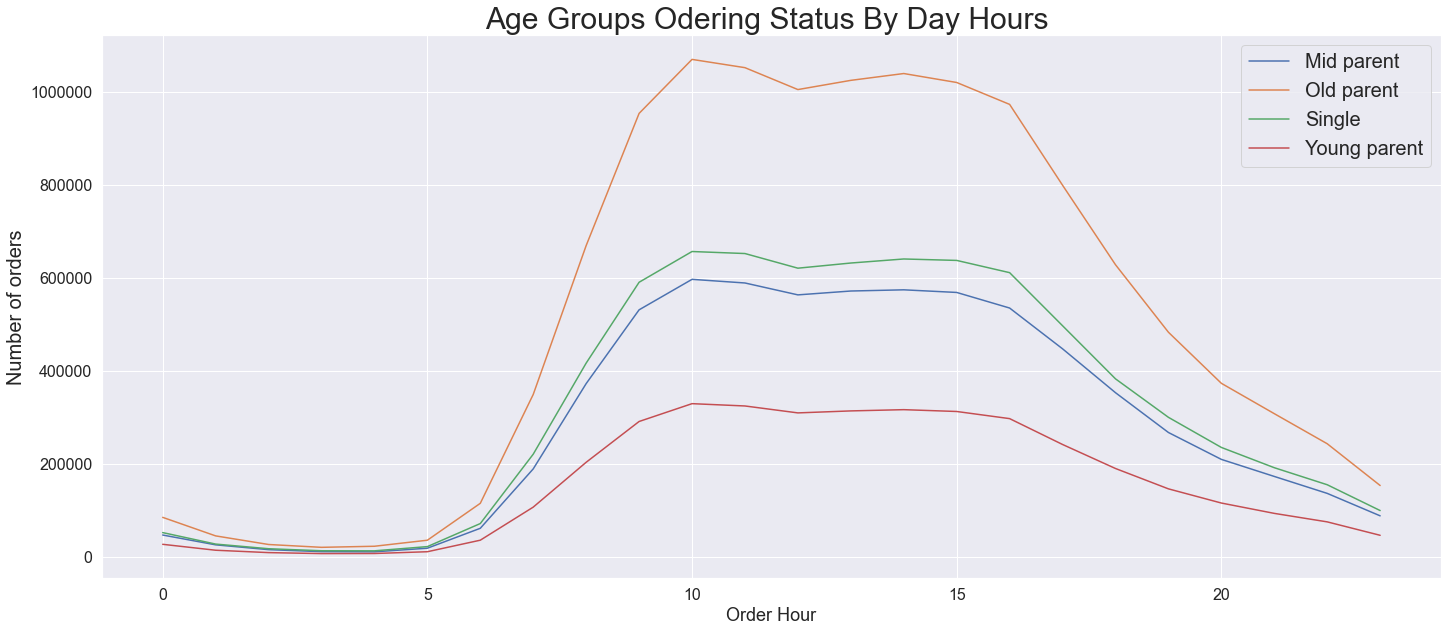

In [352]:
age_cross_hour.plot(kind = 'line', fontsize=16)

plt.title('Age Groups Odering Status By Day Hours ', fontsize=30)
plt.xlabel('Order Hour', fontsize=18)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
# Save lineplot chart as png
plt.savefig(os.path.join(path,'line_age_by_hour_order.png'))
plt.show()

In [75]:
number_cross_hour = pd.crosstab(df_active['order_hour_of_day'], df_active['busiest_period_of_day'], dropna=False)
number_cross_hour

busiest_period_of_day,Average orders,Fewest orders,Most orders
order_hour_of_day,,,
0,0,208042,0
1,0,109621,0
2,0,65691,0
3,0,48796,0
4,0,50763,0
5,0,84418,0
6,0,281013,0
7,863213,0,0
8,1659110,0,0


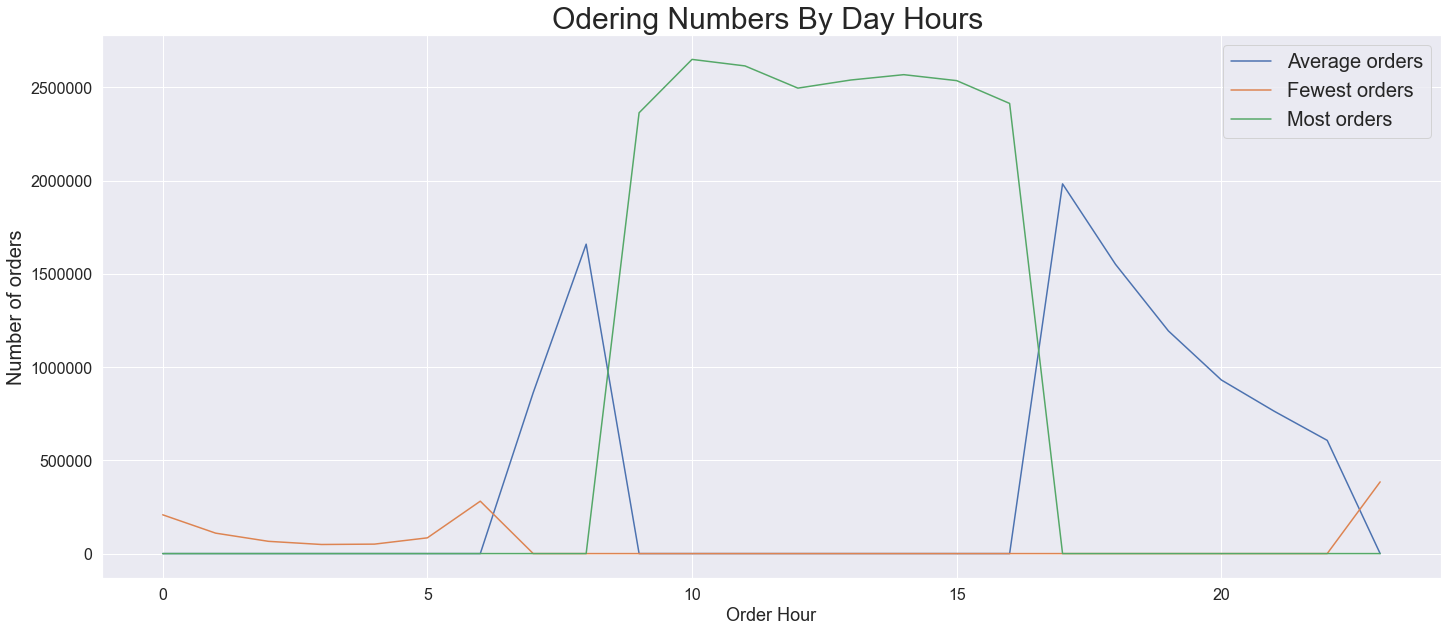

In [76]:
number_cross_hour.plot(kind = 'line', fontsize=16)

plt.title('Odering Numbers By Day Hours ', fontsize=30)
plt.xlabel('Order Hour', fontsize=18)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
# Save lineplot chart as png
plt.savefig(os.path.join(path,'line_number_by_hour_order.png'))
plt.show()

In [89]:
cus_unique.loc[cus_unique['department']=='snacks'].nunique()

user_id                          321
Gender                             2
State                             51
Age                               63
n_dependants                       4
fam_status                         4
income                           319
order_id                         321
order_number                      17
day_of_week                        7
order_hour_of_day                 21
days_since_prior_order            31
product_id                       163
add_to_cart_order                 13
reordered                          1
product_name                     163
aisle_id                          11
department_id                      1
prices                            52
price_label                        2
two_busiest_days                   3
busiest_period_of_day              3
max_order                         28
loyalty_flag                       3
average_product_price            312
spending_flag                      2
median_days_since_prior_order     45
f